<a href="https://colab.research.google.com/github/mars241/PYTHON/blob/main/WCS_AAM_Matplolib_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

# Exécutez le code ci-dessous :



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

# Vous avez maintenant un DataFrame avec des données météorologiques

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :

# Maintenant, effectuez les tâches suivantes :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis. 

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

# 4 graphiques
Vous devez montrer une figure avec 4 sous-graphes :
- Pour le graphique en haut à gauche : un nuage de points avec les températures MAX (en rouge) et MIN (en bleu) (axe des ordonnées), et la date en axe des abscisses.
- Pour le graphique en haut à droite : [un camembert](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html) avec les fréquences des opinions. Pourriez-vous "exploser" la partie "très bien" ?
- Pour la partie en bas à gauche : un zoom sur le mois de janvier, avec les températures MAX sur un graphique en colonne (barre), et les températures MIN sur une courbe (plot). La date est en abscisse.
- Pour le graphique en bas à droite : [un histogramme ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)avec les températures MAX en abscisse. 

Chaque graphique doit avoir un titre, une légende pour les couleurs, et bien sûr, des axes lisibles (ticks).

Voici un exemple de ce qui est attendu :

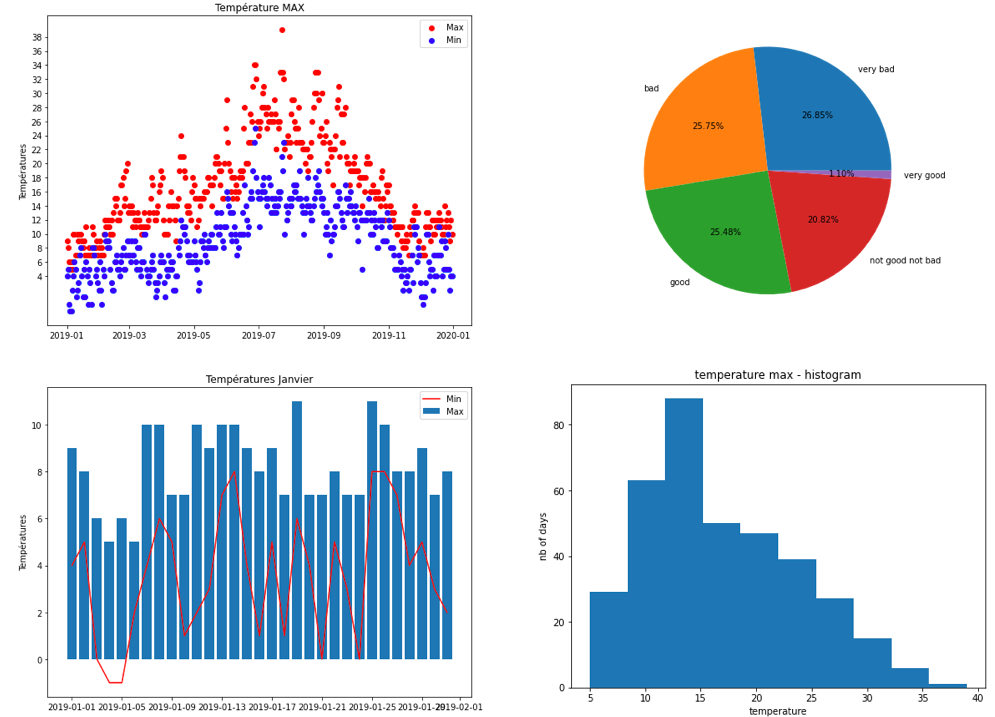

In [ ]:
# 1er reflexe: avoir un apperçu des données étudiées avec "df.columns":
df_weather.columns

# On a 4 colonnes :  DATE; MAX_TEMPERATURE_C ; MIN_TEMPERATURE_C ; OPINION 

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'OPINION'], dtype='object')

In [ ]:
# 2eme reflexe: avoir quelques métriques(données calculables) des données étudiées avec "df.describe" =FR:"DataFrame.résumé":
df_weather.describe()

# On a 2 colonnes aggrégables :MAX_TEMPERATURE_C ; MIN_TEMPERATURE_C

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C
count,365.000000,365.000000
mean,16.810959,9.095890
std,6.712698,4.814026
min,5.000000,-1.000000
25%,11.000000,5.000000
50%,16.000000,9.000000
75%,21.000000,13.000000
max,39.000000,25.000000


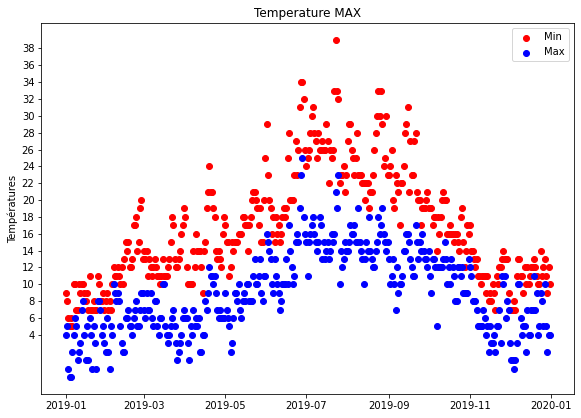

In [ ]:
# Graphe 1: Pour le graphique en haut à gauche : un nuage de points avec les températures MAX (en rouge) et MIN (en bleu) (axe des ordonnées), et la date en axe des abscisses.

plt.subplots(figsize = (21, 15))

plt.subplot(221)
plt.scatter(x=df_weather['DATE'], y=df_weather['MAX_TEMPERATURE_C'], color='red')
plt.scatter(x=df_weather['DATE'], y=df_weather['MIN_TEMPERATURE_C'], color='blue')
plt.yticks(range(4, 40, 2))
plt.ylabel("Températures")
plt.title("Temperature MAX")

lgd = plt.legend;
lgd({'Min', 'Max'})

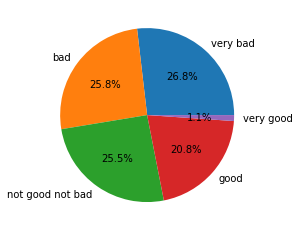

In [ ]:
#Question: Graphe2:Pour le graphique en haut à droite : un camembert avec les fréquences des opinions. Pourriez-vous "exploser" la partie "très bien" ?
#Compléter le code ci-dessous :
df_weather['OPINION'].value_counts() # Hé, value_counts() semble être une bonne méthode pour la tarte. Comment puis-je l'utiliser ?
#pré-resultat affiché:
#very bad            98
#bad                 94
#good                93
#not good not bad    76
#very good            4
#Name: OPINION, dtype: int64

percentage = df_weather['OPINION'].value_counts(normalize=True)*100
opinion = ['very bad', 'bad', 'not good not bad', 'good', 'very good']
plt.pie(percentage, labels=opinion, autopct='%1.1f%%') # Astuce 1: autopct='%1.1f%%':est utilisé pour prendre des valeurs flottantes jusqu'à la dixième place après la décimale comme pourcentage pour le diagramme circulaire, c'est généralement une forme de chaîne formatée.
plt.show()

#very good  4 <=> 1,1% sur le camembert est infime par rapport à 100%, c'est pour cela on pousse j'usqu'à la dixième place après la décimale '%1.1f%%' afin d'être réprésentatif sur le graphe.

In [ ]:
# Graphe 2: Autrement
plt.subplot(222)
percentage = df_weather['OPINION'].value_counts(normalize=True)*100
opinion = ['very bad', 'bad', 'not good not bad', 'good', 'very good']
myexplode = [0, 0, 0, 0, 0.9] # Astuce 2: On donne un poids '0.9' conséquent au 'very bad' afin d'être réprésentatif sur le graphe.
plt.pie(percentage, labels=opinion, autopct='%1.1f%%', explode=myexplode)

<BarContainer object of 31 artists>

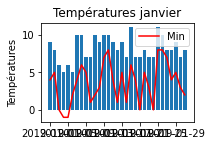

In [ ]:
# Graphe 3 : Pour la partie en bas à gauche : un zoom sur le mois de janvier, avec les températures MAX sur un graphique en colonne (barre), et les températures MIN sur une courbe (plot).
# La date est en abscisse.

plt.subplot(221)
data = df_weather['DATE'].loc[df_weather['DATE'].dt.month==1]
data = data.astype(str)
data1 = list(data)


x = data1
y = list(df_weather.loc[:30, 'MAX_TEMPERATURE_C'])
ypoints = list(df_weather.loc[:30, 'MIN_TEMPERATURE_C'])
plt.plot(ypoints, color = 'r')
plt.xticks(range(0, len(data1)+1, 4))
plt.legend({'Min'})
plt.ylabel('Températures')
plt.title('Températures janvier')
plt.bar(x, y)

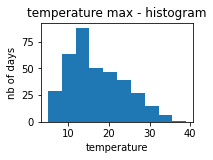

In [ ]:
#Graphe 4 : Pour le graphique en bas à droite : un histogramme avec les températures MAX en abscisse.


plt.subplot(224)
plt.hist(df_weather['MAX_TEMPERATURE_C'], bins=10)
plt.ylabel('nb of days')
plt.xlabel('temperature')
plt.title('temperature max - histogram')

plt.show()

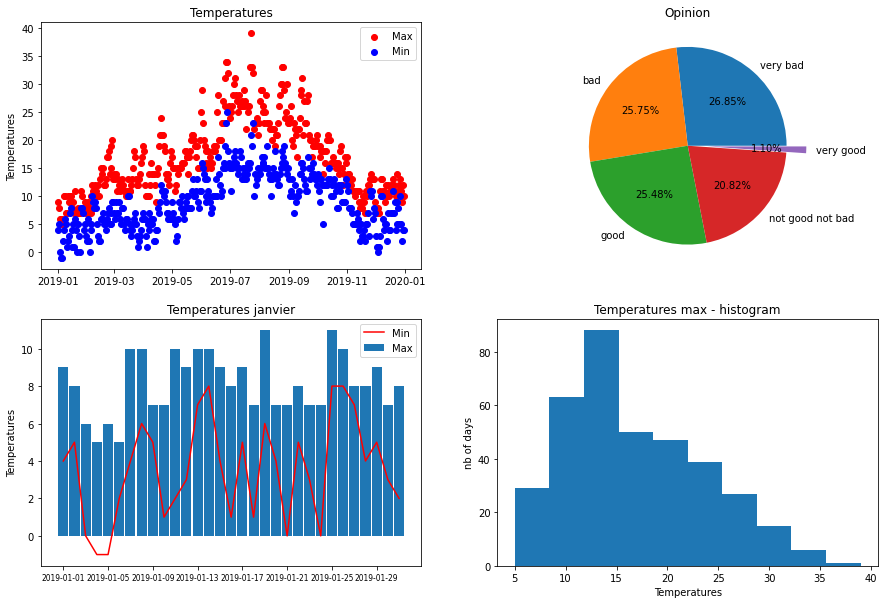

In [ ]:
# Réunir toutes les 4 graphes:
# Creer la figure
fig, temp = plt.subplots(figsize = (15,10), nrows=2, ncols=2)

# Creer 1 scatterplot chart (position 1)
temp[0][0].scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red')
temp[0][0].scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue')
temp[0][0].set_title('Temperatures')
temp[0][0].set_ylabel('Temperatures')
temp[0][0].legend(['Max','Min'])

# Creer 2 pie chart (position 2)
pie_df = pd.DataFrame(round(df_weather['OPINION'].value_counts() / df_weather['OPINION'].value_counts().sum() * 100,2)).reset_index()
pie_df = pie_df.rename(columns={"index": "OPINION", "OPINION": "OP_VAL"})
pie_labels = pie_df['OPINION'].unique().tolist()
pie_weight = pie_df['OP_VAL']
temp[0][1].pie(pie_weight, explode = (0,0,0,0,0.2), labels = pie_labels, autopct='%.2f%%')
temp[0][1].set_title('Opinion')

#  Creer 3 histogramme chart (position 3)
df_january = df_weather.loc[(df_weather['DATE']>= "2019-01-01") & (df_weather['DATE']< "2019-02-01")]
temp[1][0].bar(df_january["DATE"], df_january["MAX_TEMPERATURE_C"], width = 0.9)
temp[1][0].plot(df_january["DATE"], df_january["MIN_TEMPERATURE_C"], c= 'red')
temp[1][0].set_title('Temperatures janvier')
temp[1][0].set_ylabel('Temperatures')
temp[1][0].tick_params(axis='x', labelsize=7.5)
temp[1][0].xaxis.set_major_locator(plt.MaxNLocator(9))
temp[1][0].legend(['Min', 'Max'])

#  Creer 4 bar chart emplillés (position 4)
temp[1][1].hist(df_weather["MAX_TEMPERATURE_C"])
temp[1][1].set_title('Temperatures max - histogram')
temp[1][1].set_xlabel('Temperatures')
temp[1][1].set_ylabel('nb of days')

plt.show()


## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) : 
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

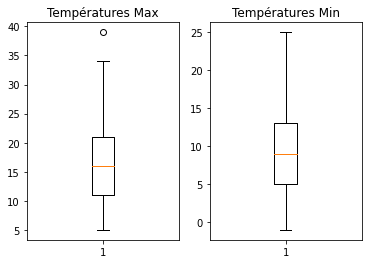

In [ ]:
# Votre code ici :
# Pour celui en haut à gauche : nuage de points avec les températures MAX (en rouge) et MIN (en bleu) (axe des ordonnées), et la date sur l'axe des abscisses.

# Pour la température maximale, il y a une aberration.
plt.subplot(121)
plt.boxplot(df_weather['MAX_TEMPERATURE_C'])
plt.ylim()
plt.title('Températures Max')

plt.subplot(122)
plt.boxplot(df_weather['MIN_TEMPERATURE_C'])
plt.ylim()
plt.title('Températures Min')
plt.show()


## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : 
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :



Dernier point, mais non le moindre
Nous saurions si l'Opinion est un bon indicateur. Pourriez-vous dessiner un nuage de points avec :

DATE sur l'axe des X
Température MAX sur l'axe des Y
Coloriez en vert les bons et très bons points.
Coloriez en rouge les points mauvais et très mauvais.
Coloriez en jaune les points pas bons pas mauvais.
Astuces :

l'attribut index d'une série peut vous aider à trier correctement la date.
vous pouvez avoir besoin d'empiler plusieurs graphiques basés sur des tranches de DataFrame
Le graphique doit avoir un titre, une légende pour les couleurs, et bien sûr, des axes (ticks) lisibles.

Voici un exemple de ce qui est attendu :

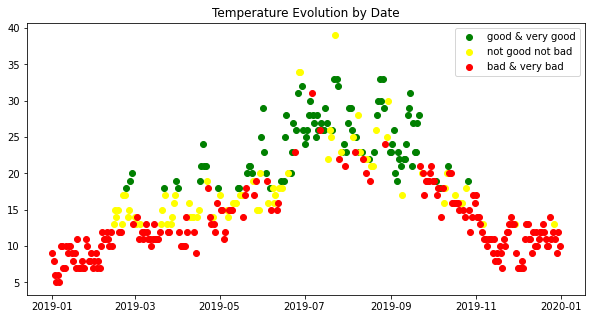

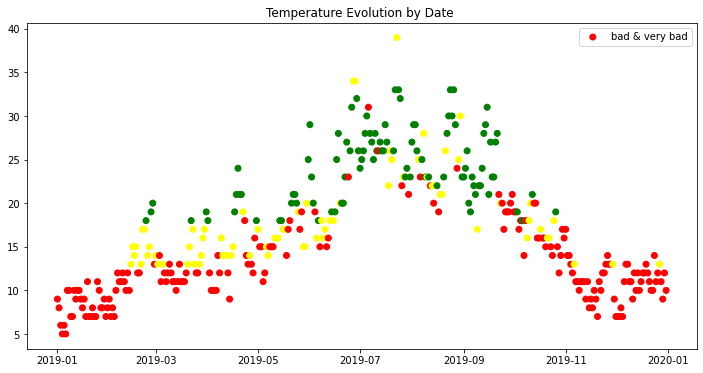

In [ ]:
# C'est votre tour maintenant :

fig, ax = plt.subplots(figsize = (12,6))

colors = {'bad': 'red', 'very bad':'red', 'good': 'green', 'very good':'green', 'not good not bad':'yellow'}

ax.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], c=df_weather['OPINION'].map(colors))
# Autrement de ci-dessus:
#ax.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], c=df_weather['OPINION'].map(colors), label=colors)

plt.title('Temperature Evolution by Date ')
#ax.legend({'bad & very bad': 'red', 'good & very good': 'green', 'not good not bad': 'yellow'})
plt.legend(['bad & very bad', 'not good not bad', 'good & very good'])
#Autrement de ci-dessus :
#ax.legend({'bad & very bad': 'red', 'good & very good': 'green', 'not good not bad': 'yellow'})
plt.show()